LIME for image classification by using Keras with InceptionV3 Model.

In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)


Notebook run using keras: 3.4.1


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8efc13d71a89cee6c35cba6be2c2f2d83bbd81b10a79b20d8d87e95d98fa9ed8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Using Inception
Here we create a standard InceptionV3 pretrained model and use it on images by first preprocessing them with the preprocessing tools

In [4]:
inet_model = inc_net.InceptionV3()

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Let's see the top 5 prediction for some image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
('n02133161', 'American_black_bear', 0.6372792)
('n02105056', 'groenendael', 0.031802803)
('n02104365', 'schipperke', 0.02992132)
('n01883070', 'wombat', 0.028507452)
('n01877812', 'wallaby', 0.025098657)


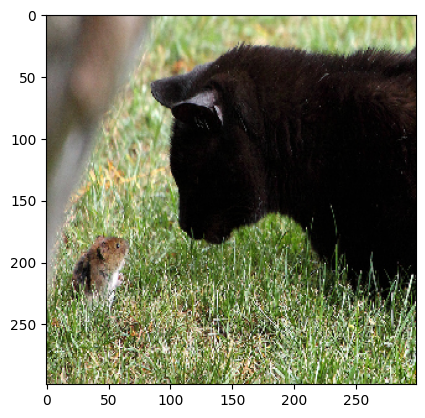

In [21]:
images = transform_img_fn([os.path.join('/content/drive/MyDrive/lime-master/doc/notebooks/data','cat_mouse.jpg')])
segmented_mask_images = transform_img_fn([os.path.join('/content/drive/MyDrive/lime-master/doc/notebooks/data','segmentation_mask_1.png')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

## Explanation
Now let's get an explanation

In [7]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [8]:
explainer = lime_image.LimeImageExplainer()

hide_color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels. Here, we set it to 0 (in the representation used by inception model, 0 means gray)

In [9]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

### Now let's see the explanation for the top class ( Black Bear)

We can see the top 5 superpixels that are most positive towards the class with the rest of the image hidden

In [10]:
from skimage.segmentation import mark_boundaries

<class 'numpy.ndarray'>
(299, 299)


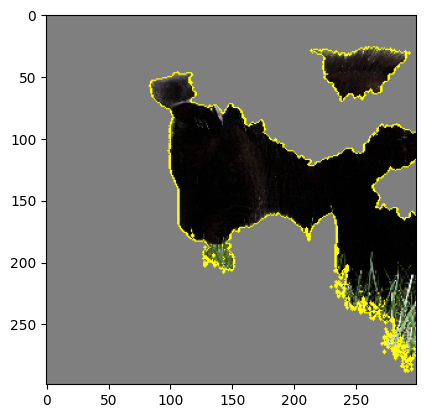

In [40]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
predicted_mask = mask
print(type(mask))
print(mask.shape)

Or with the rest of the image present:

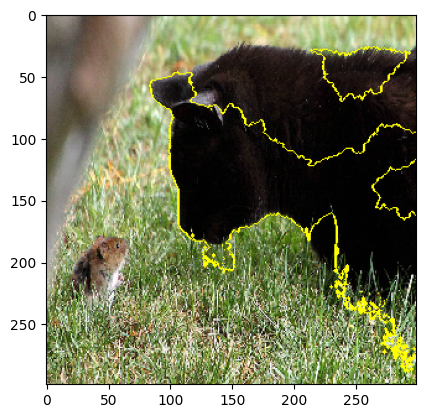

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


see that have weight at least 0.1


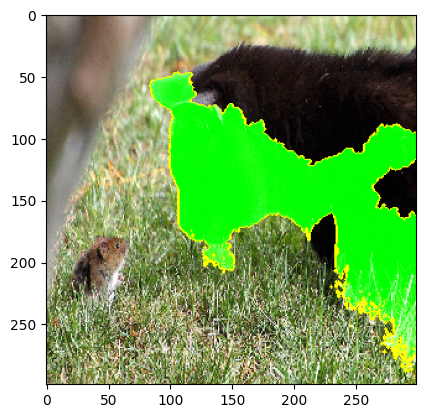

In [14]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.

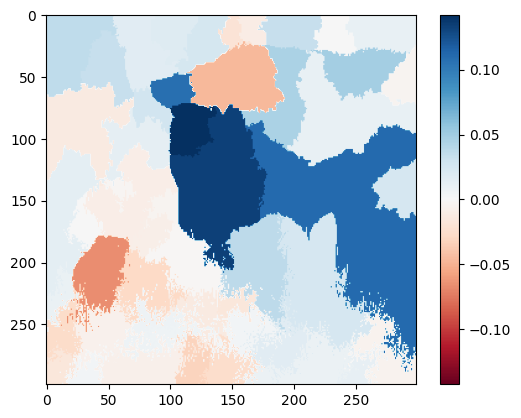

In [15]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [36]:

from numpy import asarray
import cv2
from keras.preprocessing import image
ground_truth_path = os.path.join('/content/drive/MyDrive/lime-master/doc/notebooks/data','segmentation_mask_1.png')
ground_truth_mask1 = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
ground_truth_mask1 = cv2.resize(ground_truth_mask1, (299, 299))
ground_truth_mask1 = cv2.cvtColor(ground_truth_mask1, cv2.COLOR_BGR2RGB)

In [41]:
print(predicted_mask.shape)
print(type(predicted_mask))
print(ground_truth_mask1.shape)
print(type(ground_truth_mask1))

(299, 299)
<class 'numpy.ndarray'>
(299, 299, 3)
<class 'numpy.ndarray'>


In [44]:
#predicted_mask = (predicted_mask * 255).astype(np.uint8)
predicted_mask = cv2.cvtColor(predicted_mask, cv2.COLOR_BGR2RGB)
print(type(predicted_mask))
print(predicted_mask.shape)


<class 'numpy.ndarray'>
(299, 299, 3)


In [32]:
#calculate IOU
def calculate_iou(ground_truth_mask, predicted_mask):
    # Ensure that the masks are binary (0 or 1)
    ground_truth_mask = ground_truth_mask.astype(np.bool_)
    predicted_mask = predicted_mask.astype(np.bool_)

    # Compute intersection and union
    intersection = np.logical_and(ground_truth_mask, predicted_mask)
    union = np.logical_or(ground_truth_mask, predicted_mask)

    # Calculate IoU
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [45]:
iou = calculate_iou(ground_truth_mask1,predicted_mask)
print(f"IoU: {iou:.4f}")

IoU: 0.5633
